## Odds and Ends: File Reading and Matplotlib

Now that we're familiar with the essentials of the Python language we're going to practice [reading files](https://www.pythonlikeyoumeanit.com/Module5_OddsAndEnds/WorkingWithFiles.html) and [plotting with Matplotlib](https://www.pythonlikeyoumeanit.com/Module5_OddsAndEnds/Matplotlib.html). 

Although these topics may be considered "odds and ends", they are common in many day-to-day applications. You'll find that spending some time up front to become familiar with these materials will save a lot of time down the road.

## Problem 1: Reading and Parsing Files
Let's pretend we were conducting a survey of favorite foods. Each participant is asked to list their favorite foods along with its category (e.g. dessert, snack, fruit). The food and category are separated by a colon, and each food-category pair is separated by a comma like so

```food: category, food: category, food: category, ... ```

The results of this survey are stored in a text file, `results.txt`, giving us a great opportunity to practice our file reading skills!

Our task is to write a function called `get_most_popular_foods` that takes a file path of survey results and returns the most common response for each food category in the form of a dictionary where the keys are the food categories and the values are the most common food of that type. If there is a tie, return the food that comes first alphabetically. Note, we don't know which food categories will be given before reading the file.

So, if we had data in the file `example.txt` with the contents below

``` granola bars: snack, shrimp: seafood
granola bars: snack
tuna: seafood ```

Our function would produce the following result
 ``` python
 >>> get_most_popular_foods('example.txt')
  {'snack': 'granola bars', 'seafood': ' shrimp'}
 ```
 
 The `collections.Counter` object will be useful for this problem. Also, the function `itertools.chain` may come in handy.
 
For reference, there is a short example input under `resources/example-survey.txt`. On this input, your function should produce the response as follows
 ``` python
>>> get_most_popular_foods('resources/example-survey.txt')
 {'dessert': 'cake', 'vegetable': 'carrots', 'fruit': 'peaches'}
```

In [69]:
from collections import Counter
from pathlib import Path
def get_most_popular_foods(file_path):
    """ Read in survey and determine the most common food of each type.
    
    Parameters
    ----------
    file_path : str
        Path to text file containing favorite food survey responses.
        
    Returns
    -------
    Dict[str, str]
        Dictionary with the key being food type and value being food.
    """
    file_path = Path(file_path)
    
    food_counter = Counter()
    dct = {}

    with open(file_path, mode="r") as current_file:
        text = current_file.read().replace(", ", "\n")
        text = text.split("\n")

        for line in text:
            food_counter[line.split(": ")[0]] += 1

        for line in text:
            split_list = line.split(": ")  # 0 = item, 1 = type
            cleaned_key = split_list[1].replace("\n", "") # cleaned up. type

            # if the dictionary doesn't already have something
            if dct.get(cleaned_key) == None:
                dct[cleaned_key] = split_list[0]
            else: # conflict triggered
                if food_counter[dct[cleaned_key]] == food_counter[split_list[0]]: # check old value new value tie
                    if split_list[0] < dct[cleaned_key]: # choose by alphabetical order
                        dct[cleaned_key] = split_list[0]
                elif food_counter[dct[cleaned_key]] < food_counter[split_list[0]]: # if the old value is less than the new value
                    dct[cleaned_key] = split_list[0]
    return dct

print(get_most_popular_foods("resources/example-survey.txt"))

Counter({'peaches': 2, 'cake': 1, 'kale': 1, 'carrots': 1, 'pears': 1})
{'dessert': 'cake', 'vegetable': 'carrots', 'fruit': 'peaches'}
{'dessert': 'cake', 'vegetable': 'carrots', 'fruit': 'peaches'}


In [70]:
from bwsi_grader.python.odds_and_ends import grade_file_parser
grade_file_parser(get_most_popular_foods)

uit': 'peaches', 'dessert': 'cookies'}
Counter({'tuna': 5, 'pork': 4, 'steak': 4, 'cake': 4, 'cookies': 4, 'broccoli': 4, 'bananas': 3, 'spinach': 3, 'kale': 3, 'chicken': 2, 'candy': 2, 'ice cream': 2, 'carrots': 2, 'apples': 2, 'peaches': 2, 'pears': 2})
{'meat': 'tuna', 'fruit': 'bananas', 'vegetable': 'broccoli', 'dessert': 'cake'}
Counter({'steak': 3, 'apples': 3, 'tuna': 2, 'spinach': 1, 'carrots': 1, 'ice cream': 1, 'broccoli': 1, 'chicken': 1, 'pears': 1, 'cookies': 1, 'cake': 1})
{'meat': 'steak', 'vegetable': 'broccoli', 'dessert': 'cake', 'fruit': 'apples'}
Counter({'cookies': 3, 'ice cream': 3, 'pork': 3, 'carrots': 2, 'bananas': 1, 'pears': 1, 'broccoli': 1, 'apples': 1, 'chicken': 1})
{'dessert': 'cookies', 'vegetable': 'carrots', 'fruit': 'apples', 'meat': 'pork'}
Counter({'cake': 3, 'broccoli': 3, 'carrots': 3, 'kale': 3, 'pork': 2, 'spinach': 2, 'candy': 2, 'peaches': 1, 'cookies': 1, 'chicken': 1, 'bananas': 1, 'steak': 1, 'apples': 1, 'tuna': 1})
{'dessert': 'cake', 

## Problem 2: Plotting an Image with Matplotlib

We have an image in the file `resources/mystery-img.npy`. Read and plot the image, then answer the following for Question 2 of the homework:

__What is in this image?__

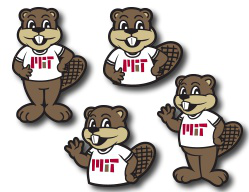

In [83]:
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path

# turn array into image
from PIL import Image as im
from IPython.display import display

filepath = Path("resources/mystery-img.npy")

img = np.load(filepath)
img = im.fromarray(img)

display(img)